<a href="https://colab.research.google.com/github/Abimonalex/S3-MINI-PROJECT/blob/main/STRS_S2_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Stress2.csv')
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [ ]:
!pip install python-rake


In [ ]:
!pip install rake-nltk


In [ ]:

from rake_nltk import Rake
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def extract_keywords(text):
    r = Rake()
    r.extract_keywords_from_text(text)
    keywords = r.get_ranked_phrases()
    return keywords


In [ ]:
# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
data = pd.read_csv('/content/Stress2.csv')

# Apply the function to your dataset
data['extracted_keywords'] = data['text'].apply(extract_keywords)


In [ ]:
# Save the updated dataset with extracted keywords (replace 'output_dataset.csv' with your desired output file name)
data.to_csv('output_dataset.csv', index=False)


In [ ]:
df2=pd.read_csv('output_dataset.csv')
df2.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,extracted_keywords
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742,"['various health ailments', 'new age b', 'mayb..."
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857,"['would greatly appreciate', 'sandia national ..."
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894,"['thing 5 year olds', 'go help another', 'driv..."
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671,"['really didnt feel nothing', 'felt nothing lo..."
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167,"['domestic violence awareness month', 'domesti..."


In [ ]:


# Load the original CSV file
df3 = pd.read_csv("output_dataset.csv")

# Select specific attributes (columns)
selected_columns = ["text", "label", "extracted_keywords"]  # Replace with your column names

# Create a new DataFrame with selected columns
df4 = df3[selected_columns]

# Save the new DataFrame to a new CSV file
df4.to_csv("new_dataset_p1.csv", index=False)


In [ ]:
df4.head()

,text,label,extracted_keywords
0,"He said he had not felt that way before, sugge...",1,"['various health ailments', 'new age b', 'mayb..."
1,"Hey there r/assistance, Not sure if this is th...",0,"['would greatly appreciate', 'sandia national ..."
2,My mom then hit me with the newspaper and it s...,1,"['thing 5 year olds', 'go help another', 'driv..."
3,"until i met my new boyfriend, he is amazing, h...",1,"['really didnt feel nothing', 'felt nothing lo..."
4,October is Domestic Violence Awareness Month a...,1,"['domestic violence awareness month', 'domesti..."


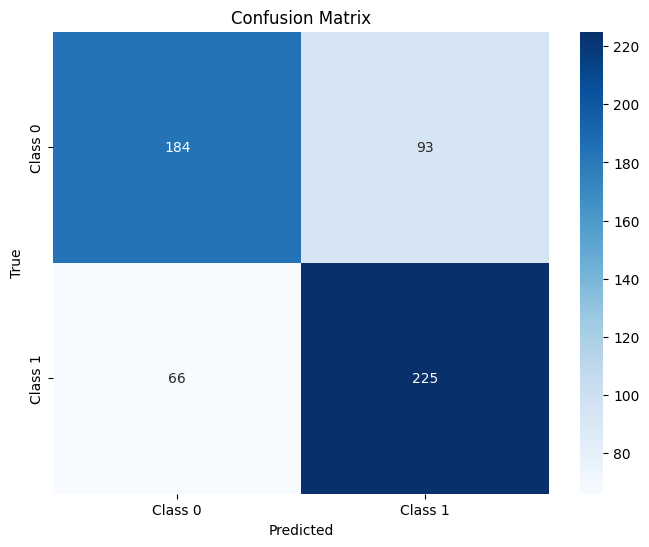

Accuracy: 0.7200704225352113
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       277
           1       0.71      0.77      0.74       291

    accuracy                           0.72       568
   macro avg       0.72      0.72      0.72       568
weighted avg       0.72      0.72      0.72       568



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
data = pd.read_csv("/content/new_dataset_p1.csv")  # Replace with your dataset path

# Split the dataset into features (X) and labels (y)
X = data['extracted_keywords'].apply(lambda x: ' '.join(eval(x)))  # Convert keywords list to space-separated strings
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a TF-IDF vectorizer to convert text data to numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the SVM model (you can adjust hyperparameters as needed)
svm_model = SVC(kernel='linear', C=2.0)

# Fit the model to the training data
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test_tfidf)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")
print(report)


In [ ]:
from scipy.sparse import hstack, csr_matrix

# Assume you have the trained svm_model and tfidf_vectorizer from the previous code

# Take user input
user_input = input("Enter some text: ")

# Extract keywords from the user input
user_keywords = extract_keywords(user_input)

# Convert the user keywords to a space-separated string
user_input_tfidf = tfidf_vectorizer.transform([' '.join(user_keywords)])

# Ensure the user_input_tfidf has the same number of features as the training data
if user_input_tfidf.shape[1] < 5000:
    # If the number of features is less than 5000, pad with zeros
    user_input_tfidf = hstack([user_input_tfidf, csr_matrix((user_input_tfidf.shape[0], 5000 - user_input_tfidf.shape[1]))])

# Make a prediction using the SVM model
user_pred = svm_model.predict(user_input_tfidf)

# Print the predicted label
print("Predicted Label:", user_pred[0])


Enter some text: good day
Predicted Label: 0


In [ ]:
!pip install joblib
import joblib
from scipy.sparse import hstack, csr_matrix

# ... (previous code)

# Save both the trained model and vectorizer to a single PKL file
joblib.dump((svm_model, tfidf_vectorizer), 'model_and_vectorizer.pkl')

# ... (remaining code)

# Load both the trained model and vectorizer from the single PKL file
loaded_model, loaded_tfidf_vectorizer = joblib.load('model_and_vectorizer.pkl')

# ... (remaining code)

# Take user input
user_input = input("Enter some text: ")

# Extract keywords from the user input
user_keywords = extract_keywords(user_input)

# Convert the user keywords to a space-separated string
user_input_tfidf = loaded_tfidf_vectorizer.transform([' '.join(user_keywords)])

# Ensure the user_input_tfidf has the same number of features as the training data
if user_input_tfidf.shape[1] < 5000:
    user_input_tfidf = hstack([user_input_tfidf, csr_matrix((user_input_tfidf.shape[0], 5000 - user_input_tfidf.shape[1]))])

# Make a prediction using the loaded model
user_pred = loaded_model.predict(user_input_tfidf)

# Print the predicted label
print("Predicted Label:", user_pred[0])



Enter some text: good day
Predicted Label: 0
